In [53]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
import numpy as np
from utils.training import GradientDescent, StochasticGradientDescent
from utils.step_methods import ConstantLearningRateStep, MomentumStep, ADAgradStep, RMSpropStep, AdamStep
from utils.neural_network import NeuralNetwork
from utils.cost_functions import SoftmaxCrossEntropy,MSE
from utils.activation_functions import Sigmoid, Identity, Softmax

# Load dataset
iris = datasets.load_iris()

inputs = iris.data

# Since each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others.
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1

def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)

    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)

In [54]:
print(inputs.shape)

(150, 4)


In [55]:
np.random.seed(124)

hidden_layers = [0,1,2,3]
nodes = [5,10,25,50]

train_input = inputs[:120]
print(train_input.shape)
test_input = inputs[120:]

train_target = targets[:120]
test_target = targets[120:]

n_features = len(iris.feature_names) # 4
n_outputs = len(iris.target_names) # 3
network_input_size = n_features

accuracies = np.zeros((len(hidden_layers),len(nodes)),float)

softmax = Softmax()

for i in range(len(hidden_layers)):
    for j in range(len(nodes)): 
        layer_output_sizes = [nodes[j]]*hidden_layers[i] + [n_outputs]
        activation_funcs = [Sigmoid()]*hidden_layers[i] + [Identity()]
        net = NeuralNetwork(network_input_size,
                layer_output_sizes,
                activation_funcs,
                SoftmaxCrossEntropy(),
            )
        net.reset_layers(random_state=123)
        net.train(StochasticGradientDescent(step_method=RMSpropStep(learning_rate=0.01, decay_rate=0.9),inputs = train_input, targets = train_target),1000)
        logit_predictions = net.predict(train_input)
        accuracies[i,j] = accuracy(softmax(logit_predictions), train_target)

(120, 4)


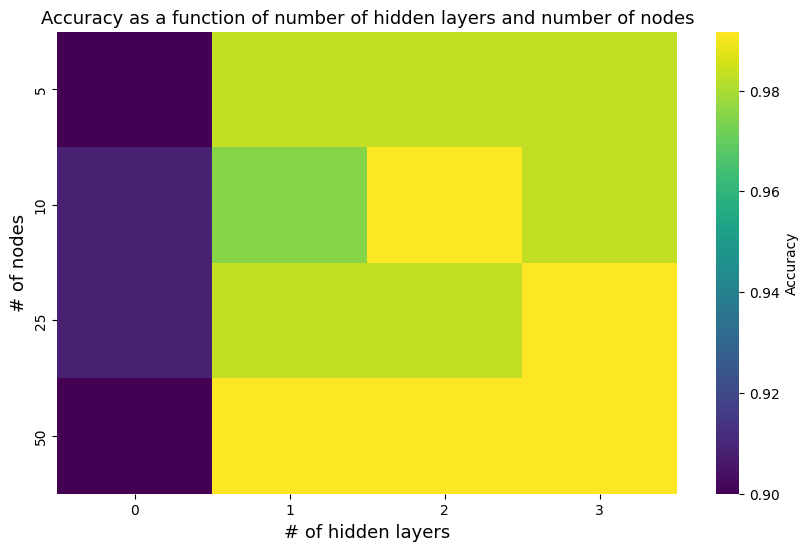

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(
    accuracies.T,  
    fmt=".2f",   
    cmap="viridis", 
    xticklabels=hidden_layers,
    yticklabels=nodes,cbar_kws={"label": "Accuracy"}
)

plt.xlabel("# of hidden layers",fontsize = 13)
plt.ylabel("# of nodes",fontsize = 13)
plt.title("Accuracy as a function of number of hidden layers and number of nodes",fontsize = 13)
plt.show()

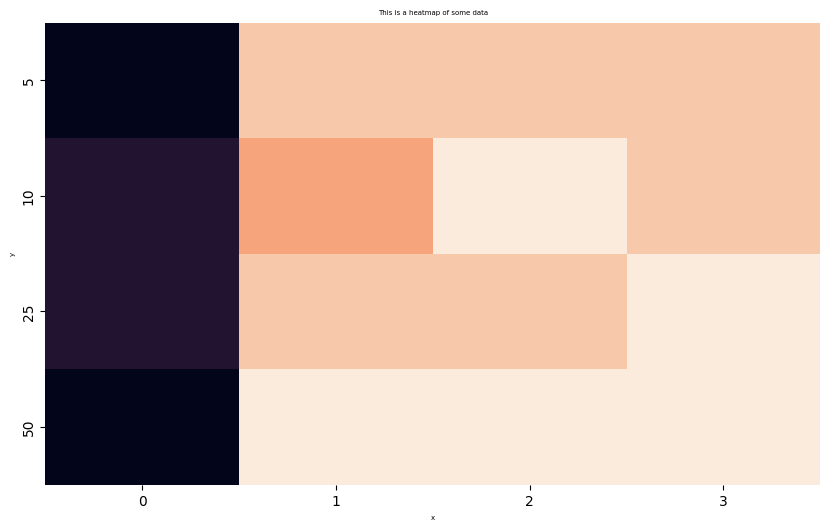

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(
    accuracies.T,  
    fmt=".2f", 
    cbar=False,
    xticklabels=hidden_layers,
    yticklabels=nodes
)

plt.xlabel("x",fontsize = 5)
plt.ylabel("y",fontsize = 5)
plt.title("This is a heatmap of some data",fontsize = 5)
plt.show()